In [126]:
import numpy as np
import pandas as pd
from matplotlib.pylab import plt
import statsmodels.formula.api as smf
%matplotlib inline

In [2]:
df = pd.read_csv('data1.csv')

In [476]:
df.head()

,feature,neighborhood,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,public_housing,pc,avg,%Rac_index
0,Racial diversity index,Astoria,0.670619,0.670942,0.669935,0.636760,0.608331,0.672337,0.655666,0.635969,0.679418,0.669118,0.656954,0.668059,1,1,0.603203,0.000644
1,Percent Asian,Astoria,0.150157,0.129747,0.159438,0.099759,0.105809,0.144667,0.121605,0.130391,0.163289,0.133342,0.160800,0.167634,1,1,0.128753,0.034242
2,Percent black,Astoria,0.063915,0.066903,0.053279,0.062808,0.062281,0.068520,0.074994,0.061926,0.085265,0.059455,0.050838,0.063981,1,1,0.058264,0.020158
3,Percent Hispanic,Astoria,0.308259,0.312709,0.290948,0.294173,0.251942,0.291553,0.306169,0.257533,0.252014,0.316690,0.267161,0.265112,1,1,0.259008,-0.006181
4,Percent white,Astoria,0.455769,0.458215,0.465999,0.512646,0.559571,0.465872,0.479774,0.526185,0.472374,0.457465,0.493184,0.479022,1,1,0.445525,0.008059


In [256]:
del df['2000']

In [6]:
df['avg'] = (df['2005'] + df['2006'] + df['2007'] + df['2008'] + df['2009'] + df['2010'] + df['2012'] \
                + df['2013'] + df['2014']  + df['2015'] + df['2016'])/12

In [80]:
df['%Rac_index'] = (df['2006']/df['2005'] + df['2007']/df['2006'] + df['2008']/df['2007'] \
                     + df['2009']/df['2008'] + df['2010']/df['2009'] + df['2011']/df['2010']\
                     + df['2012']/df['2011'] + df['2013']/df['2012'] + df['2014']/df['2013']\
                     + df['2015']/df['2014'] + df['2016']/df['2015'] - 11)/11

In [8]:
df.rename(columns={'Unnamed: 0': 'feature', 'Unnamed: 1': 'neighborhood'}, inplace=True)

In [ ]:
np.shape()

In [295]:
-(df.iloc[1][2] * np.log(df.iloc[1][2]) + df.iloc[2][2] \
  * np.log(df.iloc[2][2]) + df.iloc[3][2] * np.log(df.iloc[3][2]) + df.iloc[4][2] * np.log(df.iloc[4][2]))


1.1813814860608078

In [306]:
df_entropy = np.ones((50,12))

In [307]:
df_entropy[49][3]

1.0

In [308]:
for i in range(50):
    for j in range(12):
        df_entropy[i][j] = -(df.iloc[14*i+1][j+2] * np.log(df.iloc[14*i+1][j+2]) \
                             + df.iloc[14*i+2][j+2] * np.log(df.iloc[14*i+2][j+2]) \
                             + df.iloc[14*i+3][j+2] * np.log(df.iloc[14*i+3][j+2]) \
                             + df.iloc[14*i+4][j+2] * np.log(df.iloc[14*i+4][j+2]))

/Users/zhoubaoling/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/zhoubaoling/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until


In [664]:
avg_entropy = np.average(df_entropy, axis=1)

In [304]:
df_entropy[0][1]/df_entropy[0][0]

0.98784508309554064

In [315]:
df_entropy_inc = np.ones((50,11))

In [319]:
entropy_avg_inc = np.ones(50)

In [523]:
for i in range(50):
    x = 0
    for j in range(11):
        x += df_entropy[i][j+1]/df_entropy[i][j] - 1
    entropy_avg_inc[i] = x/11

In [524]:
entropy_avg_inc

array([ 0.00077143,  0.01082461,  0.01080025,  0.03980226,  0.01454399,
        0.00090271, -0.00397943,         nan,         nan,  0.03667429,
        0.00329914,         nan,  0.03583271,  0.01331886,  0.0001431 ,
       -0.00542488,  0.00376949,  0.00090697, -0.0071538 , -0.00731879,
               nan,  0.00194415, -0.00801718,  0.00996458, -0.01985631,
        0.00279478,         nan,  0.0057533 ,  0.00599331,  0.00764952,
        0.03439212, -0.00094989,  0.00248257,  0.00561515, -0.00302942,
        0.00758812,         nan,  0.00167333,  0.02399079, -0.00206396,
        0.00757926, -0.00039636,  0.0029836 ,         nan,         nan,
        0.03196137,  0.00489335,  0.0129556 , -0.00462167, -0.00409958])

In [85]:
df1 = df[['feature', 'neighborhood','public_housing', 'pc', 'avg','%Rac_index']]

In [86]:
df_1 = df1.groupby('neighborhood').mean()

In [87]:
df_2 = df1.pivot(index='neighborhood', columns='feature', values='avg')

In [88]:
df_1.reset_index(inplace=True)

In [89]:
df_2.reset_index(inplace=True)

In [90]:
df_2.columns

Index(['neighborhood', 'Foreign-born population',
       'Median household income ($2016)', 'Median rent, all ($2016)',
       'Percent Asian', 'Percent Hispanic', 'Percent black', 'Percent white',
       'Population aged 25+ with a bachelor's degree or higher',
       'Population aged 25+ without a high school diploma',
       'Population density (1,000 persons per square mile)', 'Poverty rate',
       'Racial diversity index', 'Severely rent-burdened households',
       'Unemployment rate'],
      dtype='object', name='feature')

In [105]:
df_3 = df1.pivot(index='neighborhood', columns='feature', values='%Rac_index')

In [106]:
df_3.reset_index(inplace=True)

In [330]:
df_3.columns

Index(['neighborhood', '%inc_rac'], dtype='object', name='feature')

In [108]:
df_3 = df_3[['neighborhood','Racial diversity index']]

In [109]:
df_3.rename(columns={'Racial diversity index': '%inc_rac'}, inplace=True)

In [45]:
df_1 = df_1[['neighborhood', 'public_housing', 'pc']]

In [665]:
df2 = pd.merge(df_1, df_2, on='neighborhood')

In [666]:
df2 = pd.merge(df_3, df2, on='neighborhood')

In [667]:
df2['entropy_index'] = entropy_avg_inc

In [668]:
df2['avg_entropy'] = avg_entropy

In [669]:
del df2['avg']
del df2['%Rac_index']
del df2['Severely rent-burdened households']

In [530]:
df2.head()

,neighborhood,%inc_rac,public_housing,pc,Foreign-born population,Median household income ($2016),"Median rent, all ($2016)",Percent Asian,Percent Hispanic,Percent black,Percent white,Population aged 25+ with a bachelor's degree or higher,Population aged 25+ without a high school diploma,"Population density (1,000 persons per square mile)",Poverty rate,Racial diversity index,Unemployment rate,entropy_index
0,Astoria,0.000644,1,1,0.392772,49549.166667,1255.833333,0.128753,0.259008,0.058264,0.445525,0.349426,0.175516,31.947523,0.155483,0.603203,0.076709,0.000771
1,Bay Ridge,0.012565,0,2,0.344772,54985.833333,1181.666667,0.195073,0.137477,0.011473,0.557862,0.336984,0.174121,27.213311,0.139571,0.511470,0.071961,0.010825
2,Bayside/Little Neck,0.010789,0,2,0.373039,72825.833333,1425.833333,0.343406,0.104808,0.017399,0.433627,0.385103,0.106135,11.760409,0.064371,0.565575,0.054655,0.010800
3,Bedford Stuyvesant,0.040840,1,1,0.182408,35744.166667,958.333333,0.024777,0.172577,0.546291,0.157402,0.219454,0.228207,54.877558,0.295008,0.521812,0.110150,0.039802
4,Bensonhurst,0.016954,0,2,0.488615,43542.500000,1080.000000,0.319712,0.122215,0.006548,0.457205,0.223780,0.254830,44.780297,0.157542,0.554404,0.070757,0.014544


In [670]:
df2.to_csv('cleaned_data.csv')

In [671]:
df3 = pd.read_csv('cleaned_data.csv')

In [672]:
del df3['Unnamed: 0']

In [673]:
df3.columns

Index(['neighborhood', '%inc_rac', 'public_housing', 'pc',
       'Foreign-born population', 'Median household income ($2016)',
       'Median rent, all ($2016)', 'Percent Asian', 'Percent Hispanic',
       'Percent black', 'Percent white',
       'Population aged 25+ with a bachelor's degree or higher',
       'Population aged 25+ without a high school diploma',
       'Population density (1,000 persons per square mile)', 'Poverty rate',
       'Racial diversity index', 'Unemployment rate', 'entropy_index',
       'avg_entropy'],
      dtype='object')

In [565]:
df3.head()

,neighborhood,%inc_rac,public_housing,pc,Foreign-born population,Median household income ($2016),"Median rent, all ($2016)",Percent Asian,Percent Hispanic,Percent black,Percent white,Population aged 25+ with a bachelor's degree or higher,Population aged 25+ without a high school diploma,"Population density (1,000 persons per square mile)",Poverty rate,Racial diversity index,Unemployment rate,entropy_index
0,Astoria,0.000644,1,1,0.392772,49549.166667,1255.833333,0.128753,0.259008,0.058264,0.445525,0.349426,0.175516,31.947523,0.155483,0.603203,0.076709,0.000771
1,Bay Ridge,0.012565,0,2,0.344772,54985.833333,1181.666667,0.195073,0.137477,0.011473,0.557862,0.336984,0.174121,27.213311,0.139571,0.511470,0.071961,0.010825
2,Bayside/Little Neck,0.010789,0,2,0.373039,72825.833333,1425.833333,0.343406,0.104808,0.017399,0.433627,0.385103,0.106135,11.760409,0.064371,0.565575,0.054655,0.010800
3,Bedford Stuyvesant,0.040840,1,1,0.182408,35744.166667,958.333333,0.024777,0.172577,0.546291,0.157402,0.219454,0.228207,54.877558,0.295008,0.521812,0.110150,0.039802
4,Bensonhurst,0.016954,0,2,0.488615,43542.500000,1080.000000,0.319712,0.122215,0.006548,0.457205,0.223780,0.254830,44.780297,0.157542,0.554404,0.070757,0.014544


df4 = df3[['Foreign-born population',
       'Median household income ($2016)', 'Median rent, all ($2016)',
       'Percent Asian', 'Percent Hispanic', 'Percent black', 'Percent white',
       "Population aged 25+ with a bachelor's degree or higher",
       'Population aged 25+ without a high school diploma',
       'Population density (1,000 persons per square mile)', 'Poverty rate',
       'Racial diversity index', 'Unemployment rate']]

from scipy.spatial.distance import cdist, pdist
from sklearn.cluster import KMeans

def elbow(data,K):
#data is your input as numpy form
#K is a list of number of clusters you would like to show.
    # Run the KMeans model and save all the results for each number of clusters
    KM = [KMeans(n_clusters=k).fit(data) for k in K]
    
    # Save the centroids for each model with a increasing k
    centroids = [k.cluster_centers_ for k in KM]

    # For each k, get the distance between the data with each center. 
    D_k = [cdist(data, cent, 'euclidean') for cent in centroids]
    
    # But we only need the distance to the nearest centroid since we only calculate dist(x,ci) for its own cluster.
    globals()['dist'] = [np.min(D,axis=1) for D in D_k]
    
    # Calculate the Average SSE.
    avgWithinSS = [sum(d)/data.shape[0] for d in dist]
    
    
    # elbow curve
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(K, avgWithinSS, 'b*-')
    plt.grid(True)
    plt.xlabel('Number of clusters')
    plt.ylabel('Average within-cluster sum of squares')
    plt.title('Elbow for KMeans clustering')
    plt.show()
    
    
    # Total with-in sum of square plot. Another way to show the result.
    wcss = [sum(d**2) for d in dist]
    tss = sum(pdist(data)**2)/data.shape[0]
    bss = tss-wcss
    
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(K, bss/tss*100, 'b*-')
    plt.grid(True)
    plt.xlabel('Number of clusters')
    plt.ylabel('Percentage of variance explained')
    plt.title('Elbow for KMeans clustering')
    plt.show()

elbow(df4, range(1,30))

from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
import numpy as np

X=df4
range_n_clusters = [2, 3, 4, 5]
for n_clusters in range_n_clusters:
    km = KMeans(n_clusters=n_clusters, random_state=324)
    cluster_labels = km.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters ={},".format(n_clusters)+" the average silhouette_score is :{}".format(silhouette_avg))

In [566]:
df3.columns

Index(['neighborhood', '%inc_rac', 'public_housing', 'pc',
       'Foreign-born population', 'Median household income ($2016)',
       'Median rent, all ($2016)', 'Percent Asian', 'Percent Hispanic',
       'Percent black', 'Percent white',
       'Population aged 25+ with a bachelor's degree or higher',
       'Population aged 25+ without a high school diploma',
       'Population density (1,000 persons per square mile)', 'Poverty rate',
       'Racial diversity index', 'Unemployment rate', 'entropy_index'],
      dtype='object')

In [674]:
df3.columns = ['neighborhood', 'perc_inc_rac', 'public_housing', 'pc', \
       'Foreign_born', 'income', \
       'rent', 'perc_Asian', 'perc_Hispanic', \
       'perc_black', 'perc_white',
       'bachelor_up', \
       'high_school_below', \
       'Population_density', 'Poverty_rate', \
       'Racial_diversity_index', 'Unemployment_rate', 'perc_entropy_change','avg_entropy']

In [592]:
df3.columns

Index(['neighborhood', 'perc_inc_rac', 'public_housing', 'pc', 'Foreign_born',
       'income', 'rent', 'perc_Asian', 'perc_Hispanic', 'perc_black',
       'perc_white', 'bachelor_up', 'high_school_below', 'Population_density',
       'Poverty_rate', 'Racial_diversity_index', 'Unemployment_rate',
       'perc_entropy_change', 'log_income', 'log_rent',
       'predicted_entropy_change'],
      dtype='object')

In [675]:
df3 = df3.dropna(axis=0)

In [676]:
a = df3[df3.public_housing == 1]['public_housing'].count()
b = df3[df3.public_housing == 0]['public_housing'].count()
print ('Sample size for neighborhood with more than or equal to 10%% public housing: %d.'%a)
print ('Sample size for neighborhood with less than 10%% public housing: %d.'%b)

Sample size for neighborhood with more than or equal to 10% public housing: 16.
Sample size for neighborhood with less than 10% public housing: 26.


In [677]:
df3['perc_inc_rac'] = df3['perc_inc_rac'] * 100

In [678]:
df3['perc_entropy_change'] = df3['perc_entropy_change'] * 100 #convert percentage into digits

In [573]:
df3['perc_inc_rac'].head()

0    0.064351
1    1.256484
2    1.078863
3    4.084041
4    1.695436
Name: perc_inc_rac, dtype: float64

lm = smf.ols('perc_inc_rac ~ C(public_housing) + Foreign_born + income + rent + perc_Asian + perc_Hispanic + perc_black + perc_white + bachelor_up + high_school_below + Population_density + Poverty_rate + Unemployment_rate'
             ,data=df3).fit()
lm.summary()

In [679]:
df3['log_income'] = np.log(df3['income'])

In [680]:
df3['log_rent'] = np.log(df3['rent'])

In [681]:
df4 = df3[df3.pc!=2]

In [682]:
c = df4[df4.pc == 1]['pc'].count()
d = df4[df4.pc == 0]['pc'].count()
print ('Sample size for neighborhood with more than or equal to 10%% public housing: %d.'%c)
print ('Sample size for neighborhood with less than 10%% public housing: %d.'%d)

Sample size for neighborhood with more than or equal to 10% public housing: 16.
Sample size for neighborhood with less than 10% public housing: 16.


In [683]:
lm = smf.ols('perc_entropy_change ~ C(pc) + perc_Asian + perc_Hispanic + Foreign_born + log_income + Population_density + Poverty_rate'
             ,data=df4).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     perc_entropy_change   R-squared:                       0.679
Model:                             OLS   Adj. R-squared:                  0.586
Method:                  Least Squares   F-statistic:                     7.268
Date:                 Mon, 20 Nov 2017   Prob (F-statistic):           0.000103
Time:                         13:30:51   Log-Likelihood:                -38.026
No. Observations:                   32   AIC:                             92.05
Df Residuals:                       24   BIC:                             103.8
Df Model:                            7                                         
Covariance Type:             nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             68.6911     25.367      2.708      0.012      16.335     121.047
C(pc)[T.1]            -0.9276      0.486     -1.908      0.068      -1.931       0.076
perc_Asian            -4.0098      2.063     -1.943      0.064      -8.269       0.249
perc_Hispanic         -5.9675      1.445     -4.130      0.000      -8.950      -2.985
Foreign_born          -7.1275      3.991     -1.786      0.087     -15.365       1.110
log_income            -5.6996      2.102     -2.711      0.012     -10.038      -1.361
Population_density     0.0232      0.008      2.919      0.008       0.007       0.040
Poverty_rate         -15.2373     10.063     -1.514      0.143     -36.005       5.531
==============================================================================
Omnibus:                        5.907   Durbin-Watson:                   2.060
Prob(Omnibus):                  0.052   Jarque-Bera (JB):                5.850
Skew:                          -0.384   Prob(JB):                       0.0537
Kurtosis:                       4.949   Cond. No.                     8.48e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.48e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [684]:
lm2 = smf.ols('perc_entropy_change ~ C(public_housing) + Foreign_born + log_income + perc_Asian + perc_black + perc_white + bachelor_up + high_school_below + Population_density + Poverty_rate + Unemployment_rate'
             ,data=df3).fit()
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     perc_entropy_change   R-squared:                       0.638
Model:                             OLS   Adj. R-squared:                  0.506
Method:                  Least Squares   F-statistic:                     4.814
Date:                 Mon, 20 Nov 2017   Prob (F-statistic):           0.000293
Time:                         13:30:55   Log-Likelihood:                -49.262
No. Observations:                   42   AIC:                             122.5
Df Residuals:                       30   BIC:                             143.4
Df Model:                           11                                         
Covariance Type:             nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 77.2026     28.143      2.743      0.010      19.728     134.677
C(public_housing)[T.1]    -1.0587      0.489     -2.163      0.039      -2.058      -0.059
Foreign_born              -8.0363      3.527     -2.279      0.030     -15.239      -0.834
log_income                -6.9368      2.397     -2.894      0.007     -11.833      -2.041
perc_Asian                 2.6709      2.237      1.194      0.242      -1.898       7.240
perc_black                 6.4830      1.753      3.699      0.001       2.903      10.063
perc_white                 3.0540      1.965      1.554      0.131      -0.959       7.067
bachelor_up                5.5862      3.685      1.516      0.140      -1.940      13.113
high_school_below         12.3409      6.697      1.843      0.075      -1.336      26.017
Population_density         0.0153      0.010      1.524      0.138      -0.005       0.036
Poverty_rate             -25.2530      9.322     -2.709      0.011     -44.291      -6.215
Unemployment_rate        -16.7991     14.867     -1.130      0.267     -47.161      13.563
==============================================================================
Omnibus:                        3.793   Durbin-Watson:                   1.574
Prob(Omnibus):                  0.150   Jarque-Bera (JB):                3.284
Skew:                           0.183   Prob(JB):                        0.194
Kurtosis:                       4.320   Cond. No.                     1.03e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.03e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [686]:
lm3 = smf.ols('avg_entropy ~ Foreign_born + log_income + perc_Asian + perc_Hispanic + perc_black + perc_white + bachelor_up + Population_density + Poverty_rate + Unemployment_rate'
             ,data=df3).fit()
lm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            avg_entropy   R-squared:                       0.443
Model:                            OLS   Adj. R-squared:                  0.263
Method:                 Least Squares   F-statistic:                     2.466
Date:                Mon, 20 Nov 2017   Prob (F-statistic):             0.0265
Time:                        13:31:26   Log-Likelihood:                 24.672
No. Observations:                  42   AIC:                            -27.34
Df Residuals:                      31   BIC:                            -8.230
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             11.4159      4.794      2.381      0.024       1.638      21.194
Foreign_born          -0.4751      0.515     -0.923      0.363      -1.525       0.575
log_income            -0.5982      0.372     -1.609      0.118      -1.356       0.160
perc_Asian            -3.2343      1.543     -2.096      0.044      -6.382      -0.087
perc_Hispanic         -3.8375      1.470     -2.611      0.014      -6.835      -0.840
perc_black            -4.0101      1.438     -2.789      0.009      -6.943      -1.077
perc_white            -4.1559      1.458     -2.850      0.008      -7.130      -1.182
bachelor_up            0.6260      0.535      1.170      0.251      -0.465       1.717
Population_density    -0.0026      0.002     -1.577      0.125      -0.006       0.001
Poverty_rate          -0.9040      1.334     -0.678      0.503      -3.625       1.817
Unemployment_rate     -3.1186      2.360     -1.321      0.196      -7.932       1.695
==============================================================================
Omnibus:                        3.956   Durbin-Watson:                   2.038
Prob(Omnibus):                  0.138   Jarque-Bera (JB):                2.751
Skew:                          -0.463   Prob(JB):                        0.253
Kurtosis:                       3.845   Cond. No.                     1.05e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.05e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [687]:
lm.params

Intercept             68.691065
C(pc)[T.1]            -0.927624
perc_Asian            -4.009777
perc_Hispanic         -5.967477
Foreign_born          -7.127534
log_income            -5.699582
Population_density     0.023240
Poverty_rate         -15.237316
dtype: float64

In [688]:
lm2.params

Intercept                 77.202551
C(public_housing)[T.1]    -1.058704
Foreign_born              -8.036257
log_income                -6.936763
perc_Asian                 2.670895
perc_black                 6.483007
perc_white                 3.053996
bachelor_up                5.586223
high_school_below         12.340884
Population_density         0.015333
Poverty_rate             -25.253027
Unemployment_rate        -16.799118
dtype: float64

In [689]:
lm3.params

Intercept             11.415945
Foreign_born          -0.475089
log_income            -0.598189
perc_Asian            -3.234312
perc_Hispanic         -3.837529
perc_black            -4.010058
perc_white            -4.155906
bachelor_up            0.626001
Population_density    -0.002559
Poverty_rate          -0.904039
Unemployment_rate     -3.118570
dtype: float64

In [690]:
df3.describe()

,perc_inc_rac,public_housing,pc,Foreign_born,income,rent,perc_Asian,perc_Hispanic,perc_black,perc_white,bachelor_up,high_school_below,Population_density,Poverty_rate,Racial_diversity_index,Unemployment_rate,perc_entropy_change,avg_entropy,log_income,log_rent
count,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000
mean,0.769264,0.380952,0.857143,0.339207,53400.912698,1180.317460,0.124114,0.246713,0.224497,0.296429,0.325901,0.188682,41.325432,0.180928,0.523953,0.079476,0.654508,0.994596,10.810458,7.050808
std,1.417112,0.491507,0.783097,0.114063,21821.096707,257.397265,0.113841,0.178880,0.231980,0.219190,0.177229,0.090973,22.224250,0.085449,0.102651,0.024942,1.315929,0.182379,0.389532,0.215720
min,-1.875071,0.000000,0.000000,0.152612,20435.833333,720.000000,0.007231,0.057543,0.006548,0.015281,0.079023,0.027224,9.423836,0.055540,0.194159,0.035003,-1.985631,0.403789,9.925045,6.579251
25%,-0.020312,0.000000,0.000000,0.241241,39493.750000,1031.666667,0.034108,0.117312,0.031041,0.107846,0.200809,0.120821,24.828769,0.114023,0.468500,0.060625,-0.081151,0.885681,10.583893,6.938931
50%,0.431079,0.000000,1.000000,0.340035,46681.666667,1150.833333,0.076772,0.169293,0.112076,0.253741,0.274091,0.191908,37.306429,0.164784,0.518456,0.074945,0.314137,0.986807,10.751105,7.048210
75%,1.218822,1.000000,1.000000,0.415681,62083.541667,1296.666667,0.175538,0.359832,0.338519,0.454285,0.366293,0.248175,52.018267,0.247554,0.599337,0.098062,1.059133,1.147957,11.036116,7.167542
max,4.232159,1.000000,2.000000,0.593550,109262.500000,1785.000000,0.437667,0.647032,0.811095,0.724299,0.726746,0.409587,100.079410,0.395372,0.745562,0.137846,3.980226,1.295530,11.601509,7.487174


In [658]:
df3.columns

Index(['neighborhood', 'perc_inc_rac', 'public_housing', 'pc', 'Foreign_born',
       'income', 'rent', 'perc_Asian', 'perc_Hispanic', 'perc_black',
       'perc_white', 'bachelor_up', 'high_school_below', 'Population_density',
       'Poverty_rate', 'Racial_diversity_index', 'Unemployment_rate',
       'perc_entropy_change', 'log_income', 'log_rent',
       'predicted_entropy_change'],
      dtype='object')

In [717]:
table1 = df3[['Foreign_born','income', 'rent', 'perc_Asian', 'perc_Hispanic', 'perc_black',
       'perc_white']].describe()
table1.to_csv('table1.csv')

In [718]:
table2 = df3[['bachelor_up', 'high_school_below', 'Population_density',
       'Poverty_rate', 'Unemployment_rate',
       'perc_entropy_change','avg_entropy']].describe()
table2.to_csv('table2.csv')

In [692]:
df3['predicted_entropy_change'] = lm2.predict()

In [693]:
lm_1 = smf.ols('predicted_entropy_change ~ perc_entropy_change', data=df3).fit()

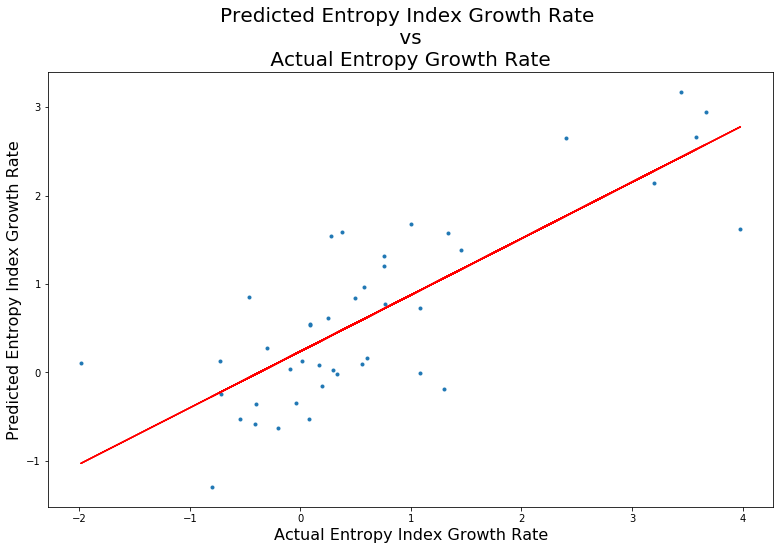

In [694]:
fig = plt.figure(figsize=(13,8))
plt.plot(df3.perc_entropy_change, lm2.predict(),'.')
plt.plot(df3.perc_entropy_change, lm_1.predict() ,'r-')
plt.xlabel('Actual Entropy Index Growth Rate', fontsize=16)
plt.ylabel('Predicted Entropy Index Growth Rate', fontsize=16)
plt.title('Predicted Entropy Index Growth Rate \n vs \n Actual Entropy Growth Rate ', fontsize=20)
#plt.xlim(0, 300)
#plt.ylim(0, 300)
#plt.gca().set_aspect('equal', adjustable='box')
#fig.savefig('fig1.jpg')

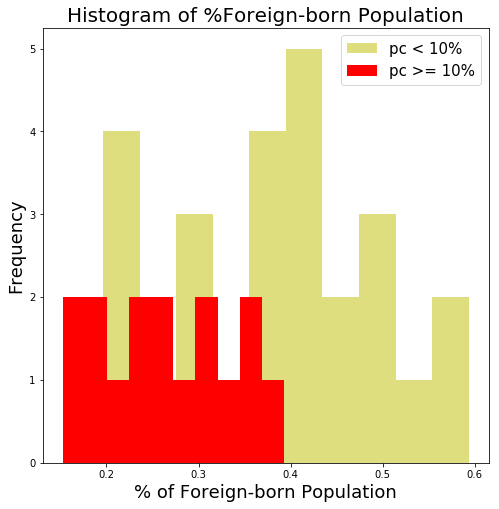

In [695]:
fig = plt.figure(figsize=(8,8))
plt.hist(df3.Foreign_born[df3.public_housing == 0],color = 'y', alpha = 0.5, bins=10, label = 'pc < 10%')
plt.hist(df3.Foreign_born[df3.public_housing == 1],color = 'r',alpha = 1.0, bins=10, label = 'pc >= 10%')
plt.legend(fontsize = 15)
plt.title('Histogram of %Foreign-born Population', fontsize = 20)
plt.xlabel('% of Foreign-born Population',fontsize = 18)
plt.ylabel('Frequency',fontsize = 18)
fig.savefig('fig2.jpg')

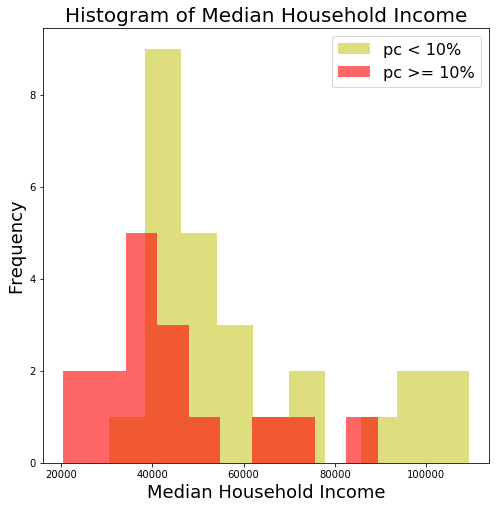

In [725]:
fig = plt.figure(figsize=(8,8))
plt.hist(df3.income[df3.public_housing == 0],color = 'y', alpha = 0.5, bins=10, label = 'pc < 10%')
plt.hist(df3.income[df3.public_housing == 1],color = 'r',alpha = 0.6, bins=10, label = 'pc >= 10%')
plt.title('Histogram of Median Household Income', fontsize = 20)
plt.xlabel('Median Household Income',fontsize = 18)
plt.ylabel('Frequency',fontsize = 18)
plt.legend(fontsize = 16)
fig.savefig('fig3.jpg')

In [697]:
df_2.columns

Index(['neighborhood', 'Foreign-born population',
       'Median household income ($2016)', 'Median rent, all ($2016)',
       'Percent Asian', 'Percent Hispanic', 'Percent black', 'Percent white',
       'Population aged 25+ with a bachelor's degree or higher',
       'Population aged 25+ without a high school diploma',
       'Population density (1,000 persons per square mile)', 'Poverty rate',
       'Racial diversity index', 'Severely rent-burdened households',
       'Unemployment rate'],
      dtype='object', name='feature')

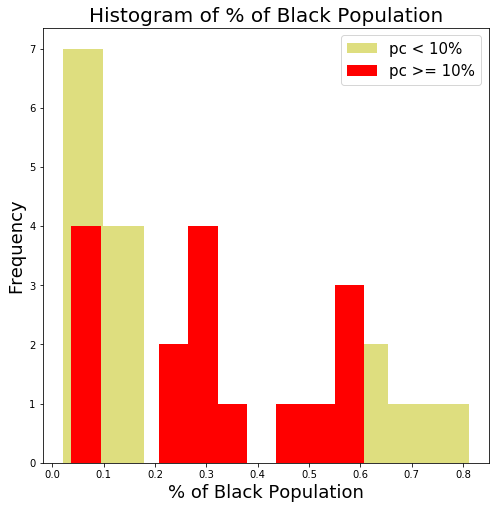

In [698]:
fig = plt.figure(figsize=(8,8))
plt.hist(df3.perc_black[df3.pc == 0],color = 'y', alpha = 0.5, bins=10, label = 'pc < 10%')
plt.hist(df3.perc_black[df3.pc == 1],color = 'r',alpha = 1.0, bins=10, label = 'pc >= 10%')
plt.legend(fontsize = 15)
plt.title('Histogram of % of Black Population', fontsize = 20)
plt.xlabel('% of Black Population',fontsize = 18)
plt.ylabel('Frequency',fontsize = 18)
#fig.savefig('fig4.jpg')

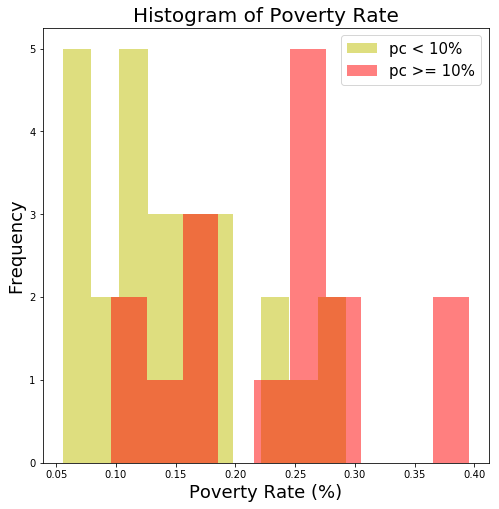

In [699]:
fig = plt.figure(figsize=(8,8))
plt.hist(df3.Poverty_rate[df3.public_housing == 0],color = 'y', alpha = 0.5, bins=10, label = 'pc < 10%')
plt.hist(df3.Poverty_rate[df3.public_housing == 1],color = 'r',alpha = 0.5, bins=10, label = 'pc >= 10%')
plt.legend(fontsize = 15)
plt.title('Histogram of Poverty Rate', fontsize = 20)
plt.xlabel('Poverty Rate (%)',fontsize = 18)
plt.ylabel('Frequency',fontsize = 18)
fig.savefig('fig5.jpg')

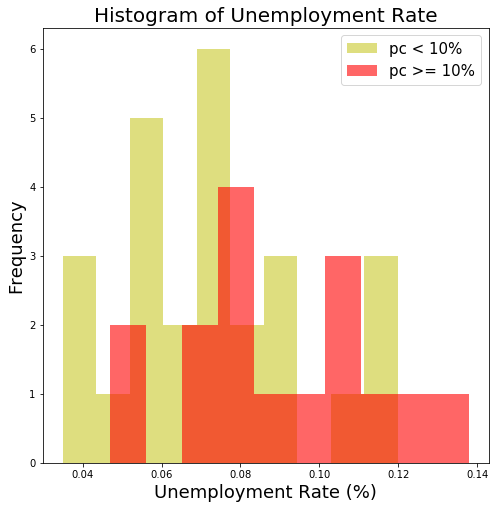

In [700]:
fig = plt.figure(figsize=(8,8))
plt.hist(df3.Unemployment_rate[df3.public_housing == 0],color = 'y', alpha = 0.5, bins=10, label = 'pc < 10%')
plt.hist(df3.Unemployment_rate[df3.public_housing == 1],color = 'r',alpha = 0.6, bins=10, label = 'pc >= 10%')
plt.legend(fontsize = 15)
plt.title('Histogram of Unemployment Rate', fontsize = 20)
plt.xlabel('Unemployment Rate (%)',fontsize = 18)
plt.ylabel('Frequency',fontsize = 18)
fig.savefig('fig6.jpg')

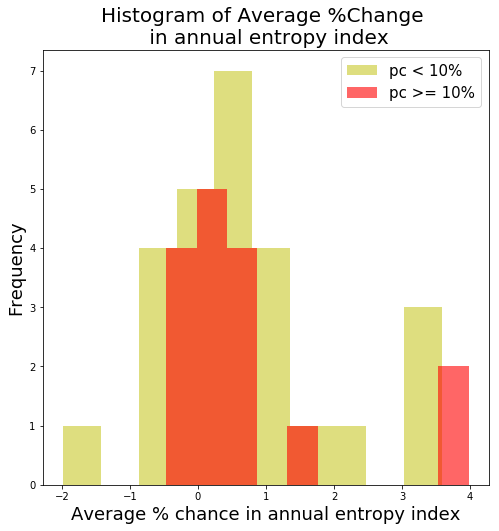

In [723]:
fig = plt.figure(figsize=(8,8))
plt.hist(df3.perc_entropy_change[df3.public_housing == 0],color = 'y', alpha = 0.5, bins=10, label = 'pc < 10%')
plt.hist(df3.perc_entropy_change[df3.public_housing == 1],color = 'r',alpha = 0.6, bins=10, label = 'pc >= 10%')
plt.legend(fontsize = 15)
plt.title('Histogram of Average %Change \n in annual entropy index', fontsize = 20)
plt.xlabel('Average % chance in annual entropy index',fontsize = 18)
plt.ylabel('Frequency',fontsize = 18)
fig.savefig('fig7.jpg')

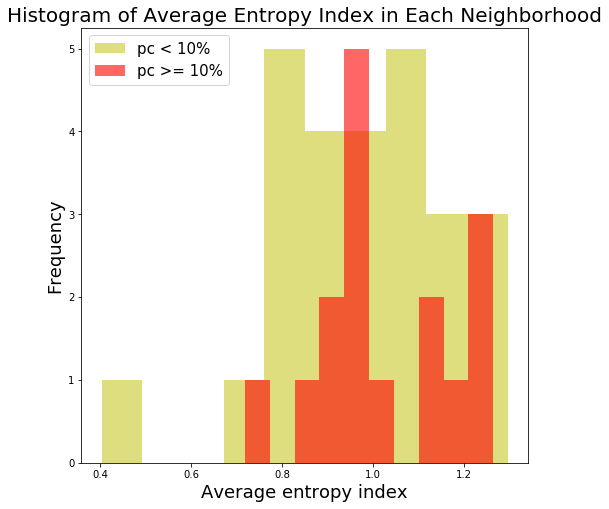

In [712]:
fig = plt.figure(figsize=(8,8))
plt.hist(df3.avg_entropy[df3.public_housing == 0],color = 'y', alpha = 0.5, bins=10, label = 'pc < 10%')
plt.hist(df3.avg_entropy[df3.public_housing == 1],color = 'r',alpha = 0.6, bins=10, label = 'pc >= 10%')
plt.legend(fontsize = 15)
plt.title('Histogram of Average Entropy Index in Each Neighborhood', fontsize = 20)
plt.xlabel('Average entropy index',fontsize = 18)
plt.ylabel('Frequency',fontsize = 18)
#fig.savefig('fig8.jpg')